In [1]:
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도


print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

!apt-get update -qq
!apt-get install fonts-nanum* -qq


# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")


# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고
fm._rebuild()

mpl.rcParams['axes.unicode_minus'] = False

3.2.2
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib
sys_font number: 17
['/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-B

In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

     |████████████████████████████████| 1.1MB 5.3MB/s 
     |████████████████████████████████| 1.9MB 17.1MB/s 
     |████████████████████████████████| 112kB 34.8MB/s 
     |████████████████████████████████| 153kB 36.7MB/s 
     |████████████████████████████████| 276kB 19.0MB/s 
     |████████████████████████████████| 2.4MB 33.8MB/s 
     |████████████████████████████████| 59.2MB 62kB/s 
     |████████████████████████████████| 4.9MB 49.1MB/s 
     |████████████████████████████████| 1.5MB 45.2MB/s 
     |████████████████████████████████| 245kB 49.2MB/s 
     |████████████████████████████████| 3.0MB 41.7MB/s 
     |████████████████████████████████| 204kB 47.7MB/s 
     |████████████████████████████████| 10.4MB 46.5MB/s 
     |████████████████████████████████| 6.7MB 44.9MB/s 
     |████████████████████████████████| 296kB 46.5MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
     |████████████████████████████████| 153kB 44.8MB

error


15.3 시계열 예측하기

In [31]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, n_steps)
  series = 0.5 * np.sin( (time - offsets1) * (freq1 * 10 + 10) ) #사인 곡선 1
  series += 0.2 * np.sin( (time - offsets2) * (freq2 * 20 + 20) ) #+사인 곡선 2
  series += 0.1 * ( np.random.rand(batch_size, n_steps) - 0.5 ) # + 잡음
  
  return series[..., np.newaxis].astype(np.float32)


In [32]:
np.random.seed(42)
n_steps= 50
series = generate_time_series(10000, n_steps + 1)
x_train, y_train = series[:7000, :n_steps], series[:7000, -1]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
x_test, y_test = series[9000:, :n_steps], series[9000:, -1]

15.3.1 기준 성능

In [34]:
y_pred = x_valid[:, -1]

In [35]:
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020211367

In [45]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[50, 1]),
  keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 0s 1ms/step - loss: 0.2412 - val_loss: 0.0862
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0599 - val_loss: 0.0435
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0345 - val_loss: 0.0278
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0239 - val_loss: 0.0204
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0182 - val_loss: 0.0162
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0148 - val_loss: 0.0136
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0118
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.0106
Epoch 9/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0093
Epoch 10/20
219/219 [==============================] - 0s 985us/step - loss: 0.0086 - val_loss: 0.00

In [46]:
model.evaluate(x_valid, y_valid)

63/63 [==============================] - 0s 741us/step - loss: 0.0043


0.00428322097286582

findfont: Font family ['NanumGothic Eco'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic Eco'] not found. Falling back to DejaVu Sans.


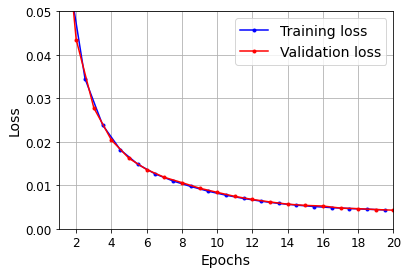

In [47]:
def plot_learning_curves(loss, val_loss):
  plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss" )
  plt.plot(np.arange(len(val_loss)) +1, val_loss, "r.-", label="Validation loss" )
  plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
  plt.axis([1, 20, 0, 0.05])
  plt.legend(fontsize=14)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.grid(True)
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

15.3.2 간단한 RNN 구현하기

In [51]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
  keras.layers.SimpleRNN(1, input_shape=[None, 1])  
])

optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0967 - val_loss: 0.0489
Epoch 2/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0369 - val_loss: 0.0296
Epoch 3/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0253 - val_loss: 0.0218
Epoch 4/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0198 - val_loss: 0.0177
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0166 - val_loss: 0.0151
Epoch 6/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0146 - val_loss: 0.0134
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0132 - val_loss: 0.0123
Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0124 - val_loss: 0.0116
Epoch 9/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 10/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0116 - val_loss: 0.0110

In [52]:
model.evaluate(x_valid, y_valid)

63/63 [==============================] - 0s 2ms/step - loss: 0.0109


0.010881561785936356

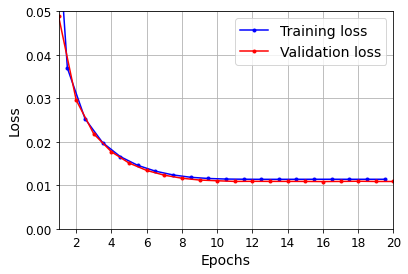

In [53]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

15.3.3 심층 RNN 

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
  keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
  keras.layers.SimpleRNN(20, return_sequences=True),
  keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer=adam)
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

In [ ]:
model.evaluate(x_valid, y_valid)

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [66]:
np.random.seed(42)
tf.random.set_seed(42)


model = keras.models.Sequential([
  keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
  keras.layers.SimpleRNN(20),
  keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0232 - val_loss: 0.0052
Epoch 2/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 3/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 4/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 5/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 6/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 7/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 8/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 9/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 10/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0030 - val_lo

In [67]:
model.evaluate(x_valid, y_valid)

63/63 [==============================] - 0s 4ms/step - loss: 0.0026


0.0026236234698444605

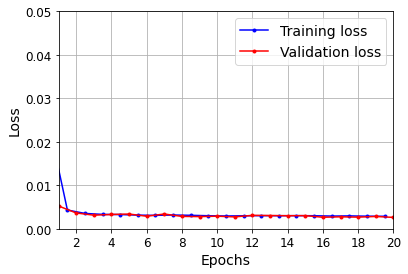

In [68]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

15.3.4 여러 타임 스텝 앞을 예측하기

In [70]:
series = generate_time_series(1, n_steps + 10)
x_new, y_new = series[: :n_steps], series[:, n_steps:]
x = x_new
for step_ahead in range(10):
  y_pred_one = model.predict(x[:, step_ahead:])[:, np.newaxis, :]
  x = np.concatenate([x, y_pred_one], axis=1)

y_pred = x[:, n_steps:]

In [79]:
y_pred.shape

(1, 20, 1)

save figure time_series_plot


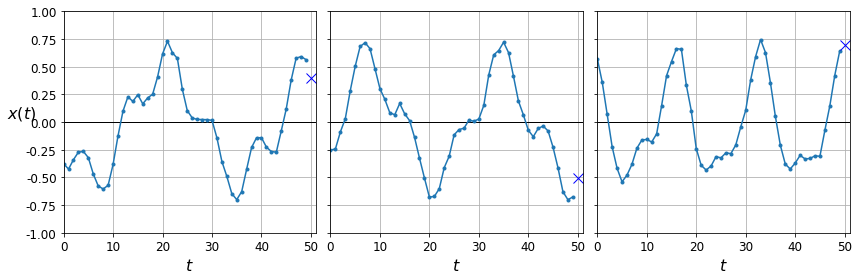

In [80]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
  plt.plot(series, ".-")
  if y is not None:
    plt.plot(n_steps, y, "bx", markersize=10)
  if y_pred is not None:
    plt.plot(n_steps, y_pred, "ro")
  plt.grid(True)
  if x_label:
    plt.xlabel(x_label, fontsize=16)
  if y_label:
    plt.ylabel(y_label, fontsize=16, rotation=0)
  plt.hlines(0, 0, 100, linewidth=1)
  plt.axis([0, n_steps +1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12,4))
for col in range(3):
  plt.sca(axes[col])
  plot_series(x_valid[col, :, 0], y_valid[col, 0], y_label=("$x(t)$" if col==0 else None))
save_fig("time_series_plot")
plt.show()

ValueError: ignored

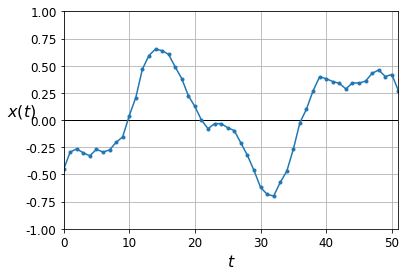

In [81]:
def plot_multiple_forecasts(x,y,y_pred):
  n_steps = x.shape[1]
  ahead = y.shape[1]
  plot_series(x[0, :, 0])
  plt.plot(np.arange(n_steps, n_steps + ahead), y[0, :, 0], "ro-", label="Actual")
  plt.plot(np.arange(n_steps, n_steps + ahead), y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
  plt.axis([0, n_steps + ahead, -1, 1])
  plt.legend(fontsize=14)

plot_multiple_forecasts(x_new, y_new, y_pred)
save_fig("forecast_ahead_plot")
plt.show()

In [82]:
np.random.seed(42)
n_steps = 50

series = generate_time_series(10000, n_steps + 10)
x_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
x_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [83]:
model = keras.models.Sequential([
  keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
  keras.layers.SimpleRNN(20),
  keras.layers.Dense(10)
])

In [84]:
y_pred = model.predict(x_new)

In [85]:
y = np.empty( (10000, n_steps, 10) )
for step_ahead in range(1, 10+ 1):
  y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
y_train = y[:7000]
y_valid = y[7000:9000]
y_test = y[9000:]

In [86]:
model = keras.models.Sequential([
  keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
  keras.layers.SimpleRNN(20, return_sequences=True),
  keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [87]:
def last_time_step_mse(y_true, y_pred):
  return keras.metrics.mean_squared_error(y_true[:, -1], y_pred[:, -1])

optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])

15.4.1 불안정한 그레이디언트 문제와 싸우기

In [88]:
class LNSimpleRNNCell(keras.layers.Layer):
  def __init__(self, units, activation="tanh", **kwargs):
    super().__init__(**kwargs)
    self.state_size = units
    self.output_size = units
    self.simple_rnn_cell = keras.layers.SimpleRNNCell(units, activation=None)
    self.layer_norm = keras.layers.LayerNormalization()
    self.activation = keras.activations.get(activation)
  def call(self, inputs, states):
    outputs, new_states = self.simple_rnn_cell(inputs, states)
    norm_outputs = self.activation(self.layer_norm(outputs))
    return norm_outputs, [norm_outputs]

In [89]:
model = keras.models.Sequential(
    [
     keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True, input_shape=[None, 1]),
     keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
     keras.layers.TimeDistributed(keras.layers.Dense(10))
    ]
)

15.4.2 단기 기억 문제 해결하기

In [90]:
model = keras.models.Sequential(
    [
     keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
     keras.layers.LSTM(20, return_sequences=True),
     keras.layers.TimeDistributed(keras.layers.Dense(10))
    ]
)

In [91]:
model = keras.models.Sequential(
    [
     keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True, input_shape=[None, 1]),
     keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True),
     keras.layers.TimeDistributed(keras.layers.Dense(10))
    ]
)

In [92]:
model = keras.models.Sequential(
    [
     keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid", input_shape=[None, 1]),
     keras.layers.GRU(20, return_sequences=True),
     keras.layers.GRU(20, return_sequences=True),
     keras.layers.TimeDistributed(keras.layers.Dense(10))
    ]
)

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(x_train, y_train[:, 3::2], epochs=20, validation_data=(x_valid, y_valid[:, 3::2]))

Epoch 1/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0675 - last_time_step_mse: 0.0592 - val_loss: 0.0463 - val_last_time_step_mse: 0.0372
Epoch 2/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0400 - last_time_step_mse: 0.0318 - val_loss: 0.0345 - val_last_time_step_mse: 0.0259
Epoch 3/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0311 - last_time_step_mse: 0.0219 - val_loss: 0.0282 - val_last_time_step_mse: 0.0182
Epoch 4/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0266 - last_time_step_mse: 0.0162 - val_loss: 0.0253 - val_last_time_step_mse: 0.0149
Epoch 5/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0245 - last_time_step_mse: 0.0138 - val_loss: 0.0240 - val_last_time_step_mse: 0.0133
Epoch 6/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0232 - last_time_step_mse: 0.0123 - val_loss: 0.0226 - val_last_time_step_mse: 0.0115
Epoch 7/20
219/219 [==

In [93]:
model = keras.models.Sequential()
model.add( keras.layers.InputLayer(input_shape=[None, 1]) )
for rate in (1,2,4,8) * 2:
  model.add(keras.layers.Conv1D(filters=20, kernel_size=2, padding="causal", activation="relu", dilation_rate=rate))
model.add(keras.layers.Conv1D(filters=10, kernel_size=1))
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0728 - last_time_step_mse: 0.0585 - val_loss: 0.0382 - val_last_time_step_mse: 0.0218
Epoch 2/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0329 - last_time_step_mse: 0.0183 - val_loss: 0.0293 - val_last_time_step_mse: 0.0151
Epoch 3/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0281 - last_time_step_mse: 0.0143 - val_loss: 0.0272 - val_last_time_step_mse: 0.0137
Epoch 4/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0265 - last_time_step_mse: 0.0129 - val_loss: 0.0258 - val_last_time_step_mse: 0.0124
Epoch 5/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0254 - last_time_step_mse: 0.0122 - val_loss: 0.0248 - val_last_time_step_mse: 0.0115
Epoch 6/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0246 - last_time_step_mse: 0.0115 - val_loss: 0.0240 - val_last_time_step_mse: 0.0109
Epoch 7/20
219/219 [==